# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

# Importing the dataset

In [2]:
data=pd.read_csv('C:\\Users\\ANIRUDDHA\\Documents\\data_science\\titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

In [3]:
def dataovervier(data,messege):
    print(f'{messege}:\n')
    print('Rows:',data.shape[0])
    print('\nNumber of Features:',data.shape[1])
    print('\nFeatures:')
    print(data.columns.tolist())
    print("\nMissing values:",data.isnull().sum().values.sum())
    print("\nUnique values:")
    print(data.nunique())

In [4]:
dataovervier(data,"Overview is:")

Overview is::

Rows: 418

Number of Features: 12

Features:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values: 414

Unique values:
PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


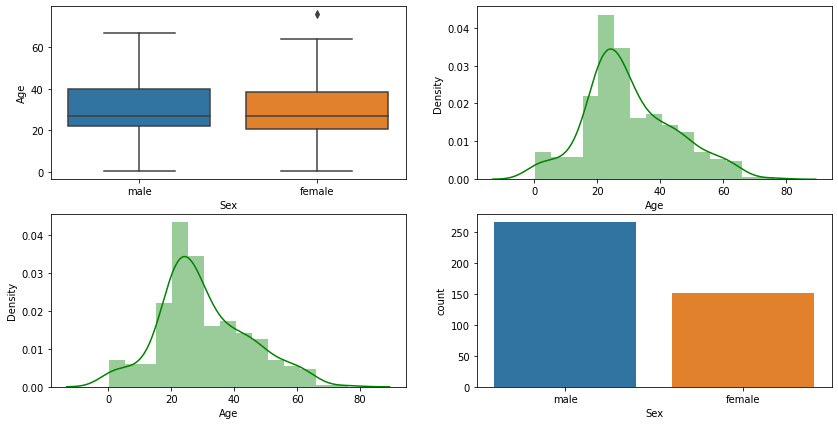

In [8]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex',y='Age',data=data)


plt.subplot(2,2,2)
sns.distplot(data['Age'],color='green')


plt.subplot(2,2,3)
sns.distplot(data['Age'],color='green')


plt.subplot(2,2,4)
sns.countplot(x='Sex',data=data)

plt.show()

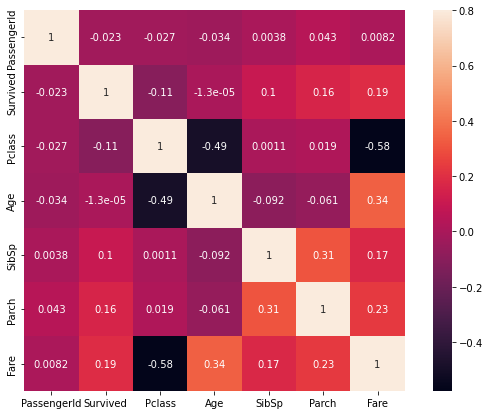

In [10]:
corrmat=data.corr()
fig=plt.figure(figsize=(10,7))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True)
plt.show()

# Drop some columns

In [11]:
data.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

# New data information after droping columns

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [13]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

# Filling null columns of age by Median value

In [15]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Fare']=data['Fare'].fillna(data['Fare'].median())

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

# Ploting graphs after filling null values

C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


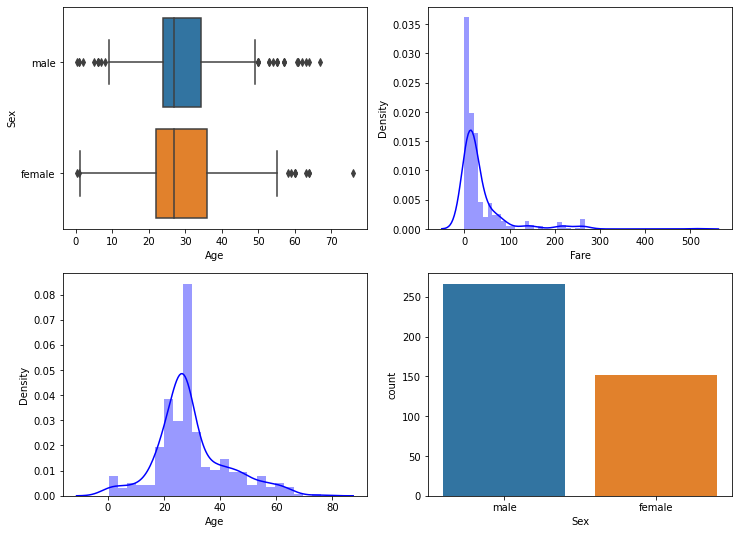

In [18]:
 plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
sns.boxplot(x='Age',y='Sex',data=data)

plt.subplot(2,2,2)
sns.distplot(data['Fare'],color='blue')

plt.subplot(2,2,3)
sns.distplot(data['Age'],color='blue')

plt.subplot(2,2,4)
sns.countplot(x='Sex',data=data)

plt.show()

# Finding age greater than 60

In [19]:
data[data['Age']>=60]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
2,0,2,male,62.0,0,0,240276,9.6875
13,0,2,male,63.0,1,0,24065,26.0000
48,1,1,female,60.0,0,0,11813,76.2917
69,1,1,female,60.0,1,4,19950,263.0000
81,0,1,male,67.0,1,0,PC 17483,221.7792
96,1,1,female,76.0,1,0,19877,78.8500
114,1,1,female,63.0,1,0,PC 17483,221.7792
142,0,1,male,61.0,1,3,PC 17608,262.3750
152,0,3,male,60.5,0,0,3701,14.4542
179,1,1,female,64.0,0,2,PC 17756,83.1583


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [21]:
label_encoder=LabelEncoder()

In [22]:
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [23]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,34.5,0,0,330911,7.8292
1,1,3,0,47.0,1,0,363272,7.0000
2,0,2,1,62.0,0,0,240276,9.6875
3,0,3,1,27.0,0,0,315154,8.6625
4,1,3,0,22.0,1,1,3101298,12.2875


# Extracting numeric part of tickets

In [24]:
data['Ticket']=data['Ticket'].apply(lambda x:re.sub(r'\D','',x))

In [26]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [27]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,1,34.5,0,0,330911,7.8292
1,3,0,47.0,1,0,363272,7.0000
2,2,1,62.0,0,0,240276,9.6875
3,3,1,27.0,0,0,315154,8.6625
4,3,0,22.0,1,1,3101298,12.2875


In [28]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

# Print training test data

In [30]:
print(x_train)

     Pclass  Sex   Age  SibSp  Parch  Ticket      Fare
292       3    1  27.0      0      0    2652    7.2292
392       3    1  13.0      0      2    2673   20.2500
142       1    1  61.0      1      3   17608  262.3750
155       3    1  24.0      0      0     752    7.5500
385       2    0  24.0      1      2  220845   65.0000
..      ...  ...   ...    ...    ...     ...       ...
256       3    1  27.0      0      0   43130    7.7500
131       1    1  53.0      0      0  113780   28.5000
249       3    0  27.0      1      0    2660   14.4542
152       3    1  60.5      0      0    3701   14.4542
362       2    0  31.0      0      0   31352   21.0000

[334 rows x 7 columns]


In [31]:
print(x_test)

     Pclass  Sex    Age  SibSp  Parch  Ticket      Fare
307       3    1   0.83      0      1  392091    9.3500
241       2    0  45.00      0      2  237789   30.0000
227       3    0  27.00      0      0  370368    7.7500
66        3    0  18.00      0      0  330963    7.8792
15        2    0  24.00      1      0    2167   27.7208
..      ...  ...    ...    ...    ...     ...       ...
196       1    1   6.00      0      2   16966  134.5000
55        3    1  10.00      4      1  382652   29.1250
144       1    1  42.00      0      0   17475   26.5500
116       3    1  27.00      0      0    2681    6.4375
103       3    1  26.00      0      0  347070    7.7750

[84 rows x 7 columns]


In [32]:
print(y_train)

292    0
392    0
142    0
155    0
385    1
      ..
256    0
131    0
249    1
152    0
362    1
Name: Survived, Length: 334, dtype: int64


In [33]:
print(y_test)

307    0
241    1
227    1
66     1
15     1
      ..
196    0
55     0
144    0
116    0
103    0
Name: Survived, Length: 84, dtype: int64


In [34]:
scaler=StandardScaler()

In [35]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

# Model Building

## List of Models

In [36]:
models={
    'Logical Regression':LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Suppot Vector Machine': SVC(),
    'K-Nearest Neighbour': KNeighborsClassifier()
}

In [40]:
for model_name,model in models.items():
    model.fit(x_train,y_train);
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    report=classification_report(y_test,y_pred)
    print(f"{model_name}- Accuracy:{accuracy:.2f}")
    print(f"classification report:\n{report}\n")

C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logical Regression- Accuracy:0.62
classification report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        52
           1       0.00      0.00      0.00        32

    accuracy                           0.62        84
   macro avg       0.31      0.50      0.38        84
weighted avg       0.38      0.62      0.47        84


Decision Tree- Accuracy:1.00
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest- Accuracy:1.00
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy       

C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Here Decision tree and Random Forest gives highest Accuracy